<a href="https://colab.research.google.com/github/manishsethi/Automation-tasks/blob/main/Exercises/day-5/Other_Model/Heirarchical_Clustering%E2%80%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering
This hands-on exercise will guide students through the basics of Hierarchical Clustering using Python. The lab uses a real dataset, lets students visualize the dendrogram, and helps them interpret and apply clustering results.

In [5]:
# 1. Setup: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler


In [6]:
# 2. Load and Prepare the Dataset
# For this exercise, we'll use the classic Iris dataset.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Optional: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


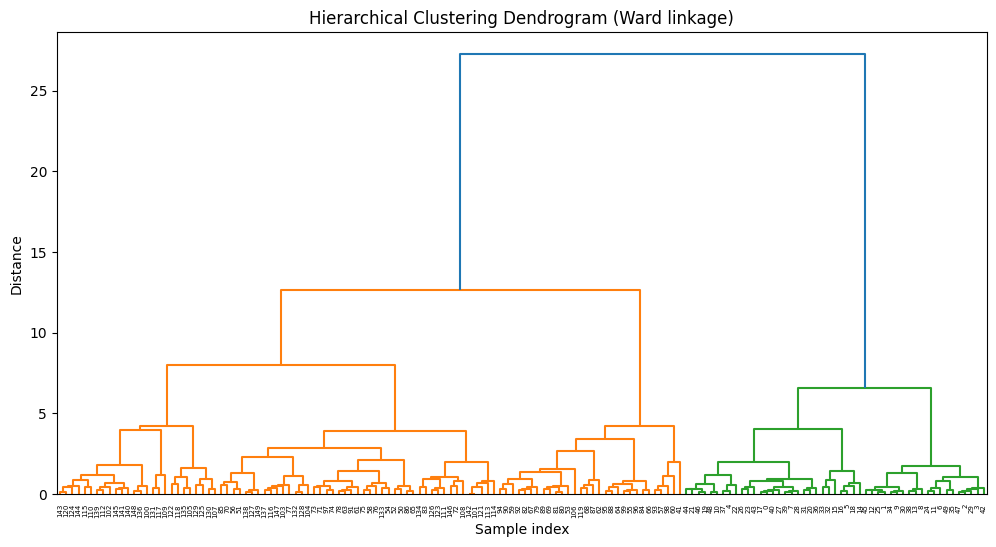

In [7]:
# 3. Compute Linkage Matrix & Plot Dendrogram
# Compute the linkage matrix using Ward's method
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


### Question for Students:

- Where would you "cut" the dendrogram to form clusters?

- What does the height of each merge represent?



In [8]:
# 4. Choose Number of Clusters & Assign Labels
#Let’s say we want to create 3 clusters:
num_clusters = 3
labels = fcluster(linked, num_clusters, criterion='maxclust')
df['cluster'] = labels
print(df['cluster'].value_counts())

cluster
3    71
1    49
2    30
Name: count, dtype: int64


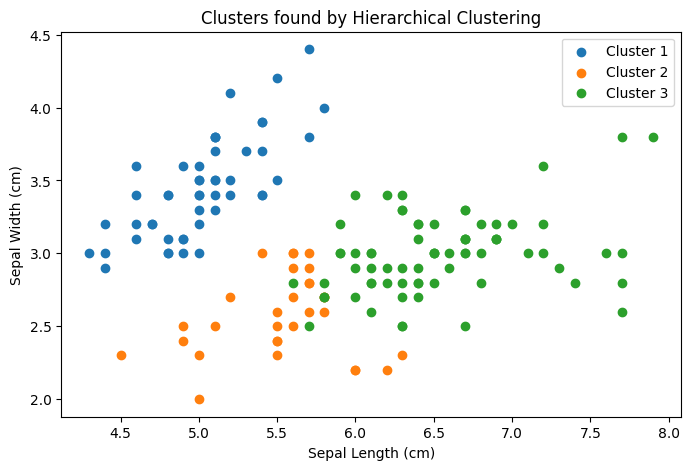

In [9]:
# 5. Visualize the Clusters
# We'll use the first two features for a quick cluster plot:
plt.figure(figsize=(8, 5))
for cluster in range(1, num_clusters+1):
    plt.scatter(df[df['cluster']==cluster]['sepal length (cm)'],
                df[df['cluster']==cluster]['sepal width (cm)'],
                label=f'Cluster {cluster}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters found by Hierarchical Clustering')
plt.legend()
plt.show()



### 6. Reflect and Report


- Compare clusters with the actual species (if known) to see if the algorithm reveals meaningful groups.

- Test different linkage methods (single, complete, average, ward) and observe dendrogram changes.

- Try different numbers of clusters (e.g., 2, 3, 4) and discuss results.